In [1]:
#Se importan las librerías a utilizar en el proyecto

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [2]:
#Se cargan los datasets a utilizar

df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full.csv')

pd.options.mode.chained_assignment = None

In [3]:
#Se examina la información del dataset, para conocer la información que se tiene, y de que manera se encuentra la información
#para saber como trabajarla

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [4]:
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [5]:
#Se examina la información del dataset, para conocer la información que se tiene, y de que manera se encuentra la información
#para saber como trabajarla

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [6]:
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [7]:
#Se examina la información del dataset, para conocer la información que se tiene, y de que manera se encuentra la información
#para saber como trabajarla

df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [8]:
df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [9]:
#Función para obtener el Error Absoluto Medio

def calculo (row):
    num = row['rougher.output.concentrate_au']*(row['rougher.input.feed_au']-row['rougher.output.tail_au'])
    den = row['rougher.input.feed_au']*(row['rougher.output.concentrate_au']-row['rougher.output.tail_au'])
    try:
        rec = 100 * num / den
    except:
        rec = 0
    return rec

In [10]:
#Aplicamos la funcion para sacar el EAM

df_train['recovery'] = df_train.apply(lambda x: calculo(x), axis = 1)

In [11]:
#Obtenemos el EAM de la columna rougher.output.recovery del dataset entrenamiento (df_train)

eam = (df_train['recovery'] - df_train['rougher.output.recovery']).abs().mean()
print('El Error Absoluto Medio es:', eam)

El Error Absoluto Medio es: 1.0724115653039479e-14


Se puede observar que el error absoluto medio que se encuentra en el df de entrenamiento (df_train) es bastante pequeño, por lo que se toma como válido el analizado (rougher.output.recovery)

In [12]:
#Se obtienen los parámetros no disponibles en el conjunto de prueba

missed_columns = set(list(df_train.columns.values))-set(list(df_test.columns.values))
missed_columns

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'recovery',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'roug

Al obtener las características que no se encuentran disponibles en el conjunto de prueba, se puede verificar que los parámetros son parte de procesos intermedios, por lo que se procederá a descartarlos para realizar el entrenamiento del modelo

## Preprocesamiento de datos

In [13]:
#Se tratam los valores ausentes tomando el valor inmediato anterior más cerca. Esto debido a que los parámetros cercanos
#en el tiempo suelen ser similares.


train_null = ((df_train.isnull().sum() / len(df_train))*100).sort_values(ascending = False)
train_null

rougher.output.recovery                               15.260973
recovery                                              13.345196
rougher.output.tail_ag                                13.345196
rougher.output.tail_au                                13.339265
rougher.output.tail_sol                               13.339265
                                                        ...    
primary_cleaner.state.floatbank8_d_level               0.160142
rougher.calculation.sulfate_to_au_concentrate          0.160142
rougher.calculation.floatbank11_sulfate_to_au_feed     0.160142
primary_cleaner.input.feed_size                        0.000000
date                                                   0.000000
Length: 88, dtype: float64

In [14]:
#Se analiza si hay duplicados para ser tratados

df_train.duplicated().sum()

0

In [15]:
#Se tratam los valores ausentes tomando el valor inmediato anterior más cerca. Esto debido a que los parámetros cercanos
#en el tiempo suelen ser similares.

test_null = ((df_test.isnull().sum() / len(df_test))*100).sort_values(ascending = False)
test_null

rougher.input.floatbank11_xanthate            6.028005
primary_cleaner.input.sulfate                 5.157104
primary_cleaner.input.depressant              4.849727
rougher.input.floatbank10_sulfate             4.388661
primary_cleaner.input.xanthate                2.834699
rougher.input.floatbank10_xanthate            2.100410
rougher.input.feed_sol                        1.144126
rougher.input.floatbank11_sulfate             0.939208
rougher.input.feed_rate                       0.683060
secondary_cleaner.state.floatbank3_a_air      0.580601
secondary_cleaner.state.floatbank2_b_air      0.392760
rougher.input.feed_size                       0.375683
secondary_cleaner.state.floatbank2_a_air      0.341530
rougher.state.floatbank10_a_air               0.290301
rougher.state.floatbank10_c_air               0.290301
rougher.state.floatbank10_d_air               0.290301
rougher.state.floatbank10_e_air               0.290301
rougher.state.floatbank10_b_air               0.290301
rougher.st

In [16]:
#Se analiza si hay duplicados para ser tratados

df_test.duplicated().sum()

0

In [17]:
#Se tratam los valores ausentes tomando el valor inmediato anterior más cerca. Esto debido a que los parámetros cercanos
#en el tiempo suelen ser similares.

full_null = ((df_full.isnull().sum() / len(df_full))*100).sort_values(ascending = False)
full_null

rougher.output.recovery                     13.730410
rougher.output.tail_ag                      12.048776
rougher.output.tail_au                      12.044374
rougher.output.tail_sol                     12.044374
rougher.input.floatbank11_xanthate           9.935728
                                              ...    
primary_cleaner.state.floatbank8_b_level     0.189294
primary_cleaner.state.floatbank8_c_level     0.189294
primary_cleaner.state.floatbank8_d_level     0.189294
primary_cleaner.input.feed_size              0.000000
date                                         0.000000
Length: 87, dtype: float64

In [18]:
#Se analiza si hay duplicados para ser tratados

df_full.duplicated().sum()

0

In [19]:
#Se imputan los valores ausentes de los datasets

df_train = df_train.fillna(method = 'ffill')
df_test = df_test.fillna(method = 'ffill')
df_full = df_full.fillna(method = 'ffill')

## Análisis de datos

A continuación se realiza un análisis para observar los cambios en la concentración de los metales por etapa, mediante gráfaicos para tener una mejor visualización

<AxesSubplot:ylabel='Frequency'>

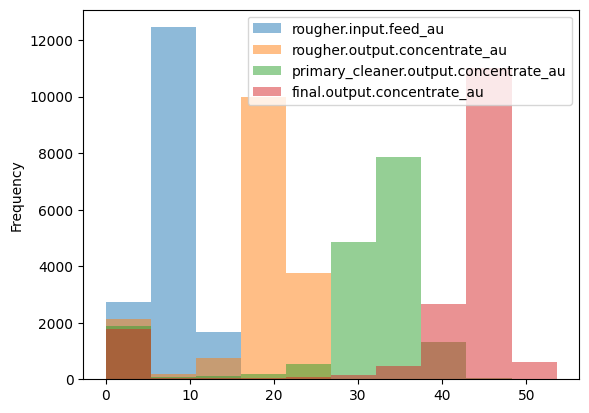

In [20]:
df_train[['rougher.input.feed_au', 
          'rougher.output.concentrate_au', 
          'primary_cleaner.output.concentrate_au', 
          'final.output.concentrate_au']].plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

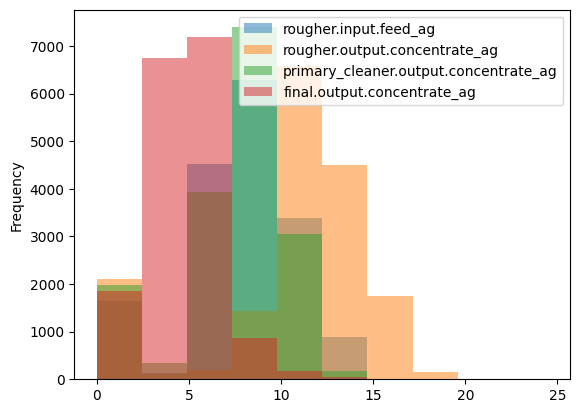

In [21]:
df_train[['rougher.input.feed_ag',
          'rougher.output.concentrate_ag',
          'primary_cleaner.output.concentrate_ag', 
          'final.output.concentrate_ag']].plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

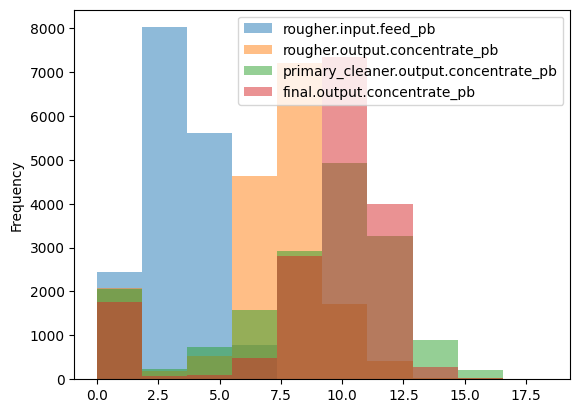

In [22]:
df_train[['rougher.input.feed_pb', 
          'rougher.output.concentrate_pb', 
          'primary_cleaner.output.concentrate_pb', 
          'final.output.concentrate_pb']].plot.hist(alpha=0.5)

Análisis para visualizar la distribución de particulas de alimentación, mediante gráficos para una mejor visualización

<AxesSubplot:ylabel='Frequency'>

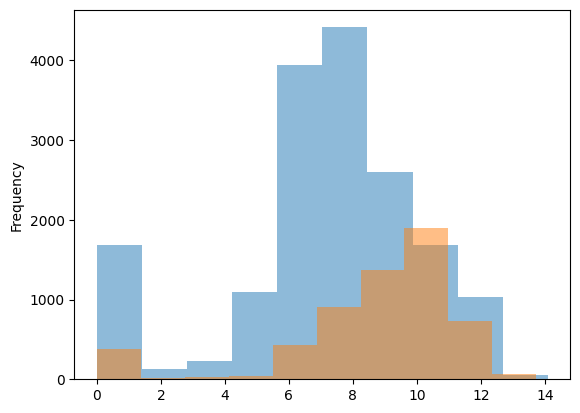

In [23]:
#Distribución particulas de alimentación

df_train['rougher.input.feed_au'].plot.hist(alpha=0.5)
df_test['rougher.input.feed_au'].plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

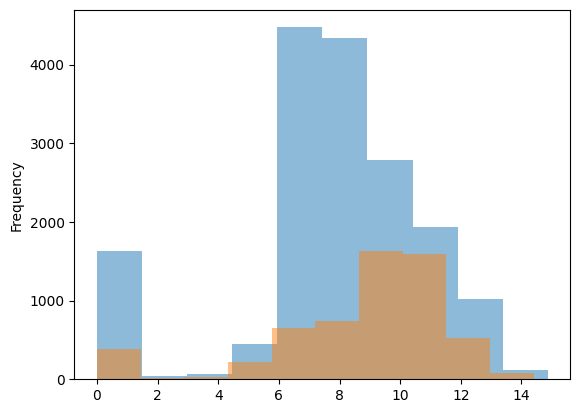

In [24]:
df_train['rougher.input.feed_ag'].plot.hist(alpha=0.5)
df_test['rougher.input.feed_ag'].plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

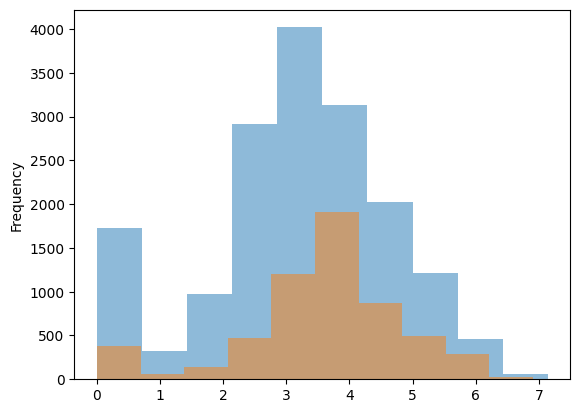

In [25]:
df_train['rougher.input.feed_pb'].plot.hist(alpha=0.5)
df_test['rougher.input.feed_pb'].plot.hist(alpha=0.5)

Visualizando las concentraciones totales mediante gráfico, para su mejor visualización

<AxesSubplot:ylabel='Frequency'>

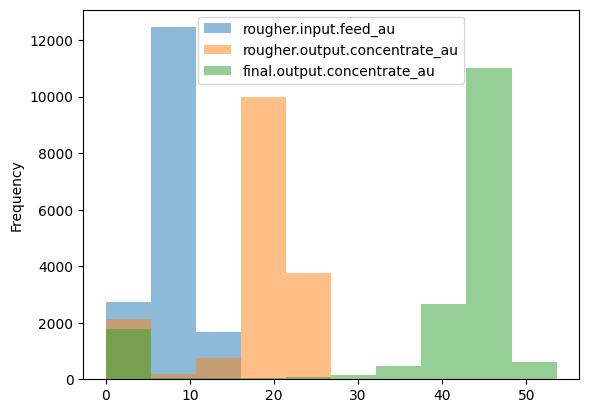

In [26]:
df_train[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'final.output.concentrate_au']].plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

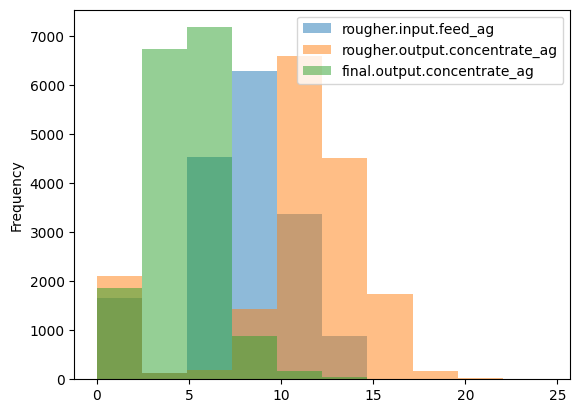

In [27]:
df_train[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'final.output.concentrate_ag']].plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

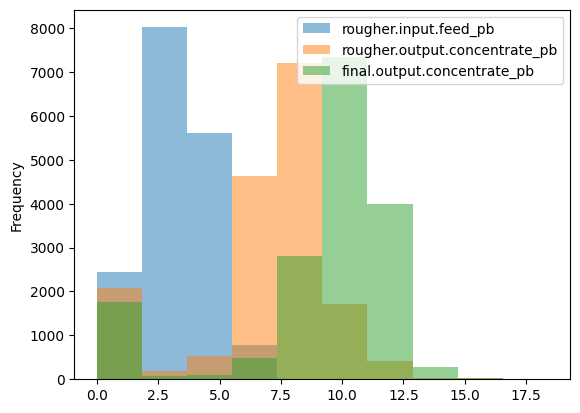

In [28]:
df_train[['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'final.output.concentrate_pb']].plot.hist(alpha=0.5)

In [29]:
#Se observa una concentración elevada cercana a cero en los minerales previamente analizados, por lo que se procederá a 
#eliminar los valores.

df_train.drop(df_train[(df_train['rougher.input.feed_au'] < 5) & 
                       (df_train['rougher.output.concentrate_au'] < 5) & 
                       (df_train['primary_cleaner.output.concentrate_au'] < 5) & 
                       (df_train['final.output.concentrate_au'] < 5)].index, inplace=True)

<AxesSubplot:ylabel='Frequency'>

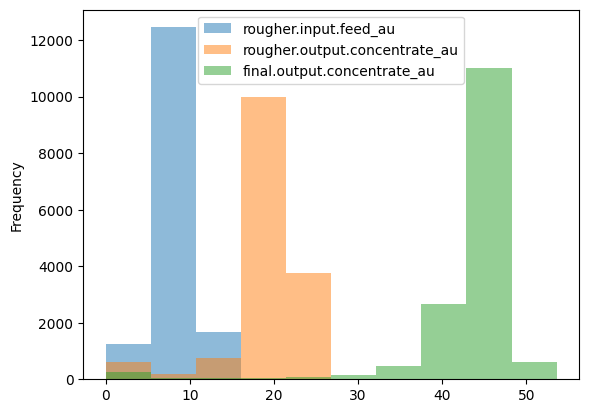

In [30]:
df_train[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'final.output.concentrate_au']].plot.hist(alpha=0.5)

In [31]:
df_train.drop(df_train[(df_train['rougher.input.feed_ag'] < 2) & 
                       (df_train['rougher.output.concentrate_ag'] < 2) & 
                       (df_train['primary_cleaner.output.concentrate_ag'] < 2) & 
                       (df_train['final.output.concentrate_ag'] < 2)].index, inplace=True)

<AxesSubplot:ylabel='Frequency'>

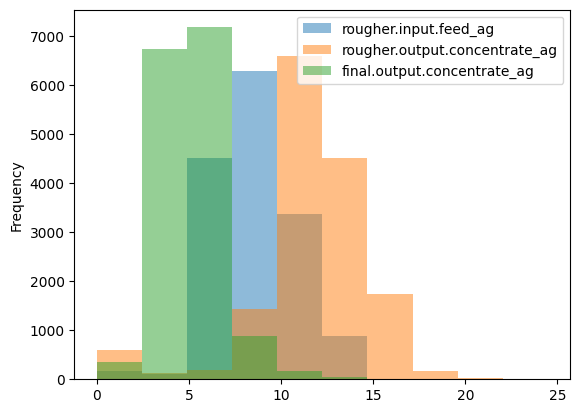

In [32]:
df_train[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'final.output.concentrate_ag']].plot.hist(alpha=0.5)

In [33]:
df_train.drop(df_train[(df_train['rougher.input.feed_pb'] < 2) & 
                       (df_train['rougher.output.concentrate_pb'] < 2) & 
                       (df_train['primary_cleaner.output.concentrate_pb'] < 2) & 
                       (df_train['final.output.concentrate_pb'] < 2)].index, inplace=True)

<AxesSubplot:ylabel='Frequency'>

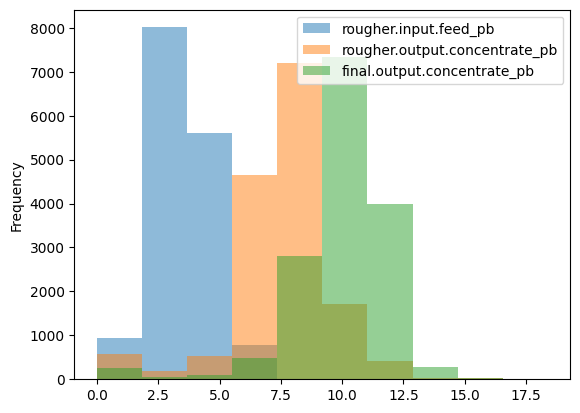

In [34]:
df_train[['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'final.output.concentrate_pb']].plot.hist(alpha=0.5)

Como conclusión de los gráficos previamente analizados, al revisar la información sobre los cambios en las concentraciones, se pudo visualizar que la concentración del mineral va incrementando conforme van pasando las etapas de purificación (tal y como debería ser).
Al revisar la distribución de las particulas de la alimentación, se pudo observar que la alimentación es bastante similar tanto en df prueba, como en df entrenamiento (con frecuencia diferente).
Al revisar las concentraciones totales, se pudo visualizar que en los 3 minerales (au, ag y pb) se miró una concentración elevada cercana a cero, por lo que se procedió a eliminar dichos valores.
Con esto analizado y realizado los tratamientos convenientes, se procederá a realizar el modelo

## Construcción del modelo

In [35]:
features = df_test.drop(['date'], axis=1)
features = features.columns.values
features

array(['primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level',
       'rougher.input.feed_ag', 'rougher.input.feed_pb',
       'rougher.input.feed_rate', 'rougher.input.feed_size',
       'rougher.input.feed_sol', 'rougher.input.feed_au',
       'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate',
       'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_le

In [36]:
target = ['rougher.output.recovery', 'final.output.recovery']

In [37]:
X_train = df_train[features].reset_index(drop = True)
y_train = df_train[target].reset_index(drop = True)

y_train.columns = [0,1]

In [38]:
#Se realiza el cálculo de sMAPE

def smape_comp(y, y_pred):
    n = len(y)
    real = abs(y)
    pred = abs(y_pred)
    dif = abs(y - y_pred)
    smape =  (1/n)*np.sum(dif /((real + pred)/2))*100
    return smape

def smape_pond(y, y_pred):
    
    y_rougher = y.iloc[:,0]
    y_pred_rougher = y_pred[:,0]
    
    y_final = y.iloc[:,1]
    y_pred_final = y_pred[:,1]
    
    smape_rougher = smape_comp(y_rougher, y_pred_rougher)
    smape_final = smape_comp(y_final, y_pred_final)
    
    return (0.25*smape_rougher + 0.75*smape_final)

In [39]:
smape_score = make_scorer(smape_pond)

## Entrenamiento de diferentes modelos y evaluación por medio de validación cruzada

In [40]:
lr_model = LinearRegression()
lr_scores = cross_val_score(lr_model, X_train, y_train, scoring = smape_score, cv = 5)

pd.options.mode.chained_assignment = None

In [41]:
lr_final_score = lr_scores.mean()

print('Puntajes sMAPE para cada iteración:', lr_scores)
print('Modelo de Regresión Lineal | sMAPE = {:.6f}'.format(lr_final_score))

Puntajes sMAPE para cada iteración: [16.01658822 10.40121606 14.26950348 15.6416771  15.90949483]
Modelo de Regresión Lineal | sMAPE = 14.447696


In [42]:
rf_model = RandomForestRegressor(random_state=54321, n_estimators=3)
rf_scores = cross_val_score(rf_model, X_train, y_train, scoring = smape_score, cv = 5)

In [43]:
rf_final_score = rf_scores.mean()

print('Puntajes sMAPE para cada iteración:', rf_scores)
print('Modelo de Regresión Lineal | sMAPE = {:.6f}'.format(rf_final_score))

Puntajes sMAPE para cada iteración: [17.65152891 15.34526623 14.91563385 19.39197837 17.26898897]
Modelo de Regresión Lineal | sMAPE = 16.914679


In [44]:
dt_model = DecisionTreeRegressor(random_state=12345)
dt_scores = cross_val_score(dt_model, X_train, y_train, scoring = smape_score, cv = 5)

In [45]:
dt_final_score = dt_scores.mean()

print('Puntajes sMAPE para cada iteración:', dt_scores)
print('Modelo de Regresión Lineal | sMAPE = {:.6f}'.format(dt_final_score))

Puntajes sMAPE para cada iteración: [24.853476   36.90985404 22.09646288 21.37233277 20.8527349 ]
Modelo de Regresión Lineal | sMAPE = 25.216972


## Conclusión

Al realizar un análisis completo y posteriormente el entrenamiento de diferentes modelos y evaluarlos con validación cruzada, podemos concluir que en este caso se tomaría la regresión lineal como el modelo más idóneo, ya que al realizar la evaluación por medio de la validación cruzada, arroja un valor promedio para la métrica sMAPE más baja.